In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("C:\\Users\\gates\\Desktop\\data_analyst_mini_project\\enterprise_qa_strategy_simulation\\data\\QK_Strategy_Realistic_1000Rows.csv")

# Preview
df.head()

Client_Name    Industry    Country         Service_Used  \
0  Client_164      Retail        USA          API Testing   
1   Client_29  Healthcare  Singapore        Cloud Testing   
2    Client_7     Banking      India       Mobile Testing   
3  Client_190      Retail        UAE       Mobile Testing   
4   Client_71  Healthcare  Singapore  Performance Testing   

   Project_Duration_Days  Project_Cost_INR  Revenue_Generated_INR Is_Renewed  \
0                    322           1088625                 613320        Yes   
1                    139           1918864                 553728        Yes   
2                    143           1110131                2344462         No   
3                    361            457704                2913589         No   
4                    145            560039                 429675        Yes   

   Team_Size  Feedback_Score Project_Month  
0          5               6           Aug  
1          5               4           Aug  
2         12               6           Feb  
3          6               7           Feb  
4         13               8           Sep

In [3]:
# Shape and Types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Null values
print("\nMissing values:\n", df.isnull().sum())

# Quick stats
df.describe(include='all').T

Shape: (1000, 11)

Data Types:
 Client_Name              object
Industry                 object
Country                  object
Service_Used             object
Project_Duration_Days     int64
Project_Cost_INR          int64
Revenue_Generated_INR     int64
Is_Renewed               object
Team_Size                 int64
Feedback_Score            int64
Project_Month            object
dtype: object

Missing values:
 Client_Name              0
Industry                 0
Country                  0
Service_Used             0
Project_Duration_Days    0
Project_Cost_INR         0
Revenue_Generated_INR    0
Is_Renewed               0
Team_Size                0
Feedback_Score           0
Project_Month            0
dtype: int64


count unique                  top freq         mean  \
Client_Name              1000    200            Client_68   12          NaN   
Industry                 1000      8            Insurance  142          NaN   
Country                  1000      7                   UK  156          NaN   
Service_Used             1000      8  Performance Testing  140          NaN   
Project_Duration_Days  1000.0    NaN                  NaN  NaN      201.878   
Project_Cost_INR       1000.0    NaN                  NaN  NaN  1049351.149   
Revenue_Generated_INR  1000.0    NaN                  NaN  NaN  1600731.279   
Is_Renewed               1000      2                  Yes  727          NaN   
Team_Size              1000.0    NaN                  NaN  NaN       11.604   
Feedback_Score         1000.0    NaN                  NaN  NaN        6.971   
Project_Month            1000     12                  Dec  105          NaN   

                                 std       min       25%        50%  \
Client_Name                      NaN       NaN       NaN        NaN   
Industry                         NaN       NaN       NaN        NaN   
Country                          NaN       NaN       NaN        NaN   
Service_Used                     NaN       NaN       NaN        NaN   
Project_Duration_Days      99.395284      30.0    114.75      202.0   
Project_Cost_INR       531127.157923  100193.0  601510.5  1056181.5   
Revenue_Generated_INR  828350.000515  150773.0  873498.5  1584424.5   
Is_Renewed                       NaN       NaN       NaN        NaN   
Team_Size                   5.168936       3.0       7.0       12.0   
Feedback_Score              1.987488       4.0       5.0        7.0   
Project_Month                    NaN       NaN       NaN        NaN   

                              75%        max  
Client_Name                   NaN        NaN  
Industry                      NaN        NaN  
Country                       NaN        NaN  
Service_Used                  NaN        NaN  
Project_Duration_Days       291.0      365.0  
Project_Cost_INR       1512051.75  1991599.0  
Revenue_Generated_INR   2352566.5  2994567.0  
Is_Renewed                    NaN        NaN  
Team_Size                    16.0       20.0  
Feedback_Score                9.0       10.0  
Project_Month                 NaN        NaN

In [4]:
# Profit
df['Profit_INR'] = df['Revenue_Generated_INR'] - df['Project_Cost_INR']

# ROI
df['ROI'] = df['Profit_INR'] / df['Project_Cost_INR']

# Project Size Grouping
df['Project_Size'] = pd.cut(df['Project_Duration_Days'],
                            bins=[0, 90, 180, 365, 1000],
                            labels=['Short-term', 'Mid-term', 'Long-term', 'Very Long'])

# Feedback Level
df['Feedback_Level'] = pd.cut(df['Feedback_Score'],
                              bins=[0, 6, 8, 10],
                              labels=['Low', 'Medium', 'High'])

# Renewal Flag
df['Renewed_Flag'] = df['Is_Renewed'].map({'Yes': 1, 'No': 0})

# Custom Client Success Score
df['Client_Success_Score'] = (
    (df['ROI'] * 0.4) +
    (df['Feedback_Score'] / 10) * 0.3 +
    df['Renewed_Flag'] * 0.3
)

In [5]:
df.to_csv("C:\\Users\\gates\\Desktop\\data_analyst_mini_project\\enterprise_qa_strategy_simulation\\data\\cleaned_qa_data.csv", index=False)

In [6]:
total_projects = df.shape[0]
avg_cost = df['Project_Cost_INR'].mean()
avg_revenue = df['Revenue_Generated_INR'].mean()
avg_profit = df['Profit_INR'].mean()
renew_rate = df['Renewed_Flag'].mean() * 100
avg_feedback = df['Feedback_Score'].mean()

print("📊 KPI Dashboard")
print(f"Total Projects: {total_projects}")
print(f"Avg. Cost: ₹{avg_cost:,.0f}")
print(f"Avg. Revenue: ₹{avg_revenue:,.0f}")
print(f"Avg. Profit: ₹{avg_profit:,.0f}")
print(f"Renewal Rate: {renew_rate:.1f}%")
print(f"Avg. Feedback Score: {avg_feedback:.2f}")

📊 KPI Dashboard
Total Projects: 1000
Avg. Cost: ₹1,049,351
Avg. Revenue: ₹1,600,731
Avg. Profit: ₹551,380
Renewal Rate: 72.7%
Avg. Feedback Score: 6.97


C:\Users\gates\anaconda3\Lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




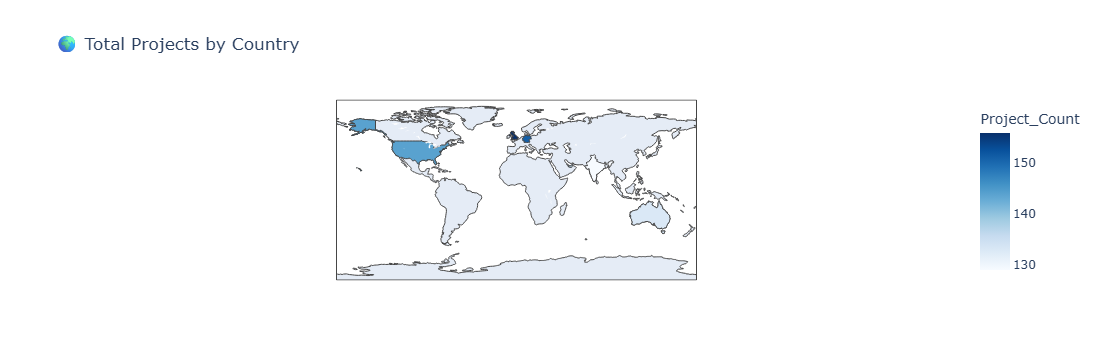

In [7]:
import plotly.express as px

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Project_Count']

fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Project_Count",
    color_continuous_scale="Blues",
    title="🌍 Total Projects by Country"
)
fig.show()

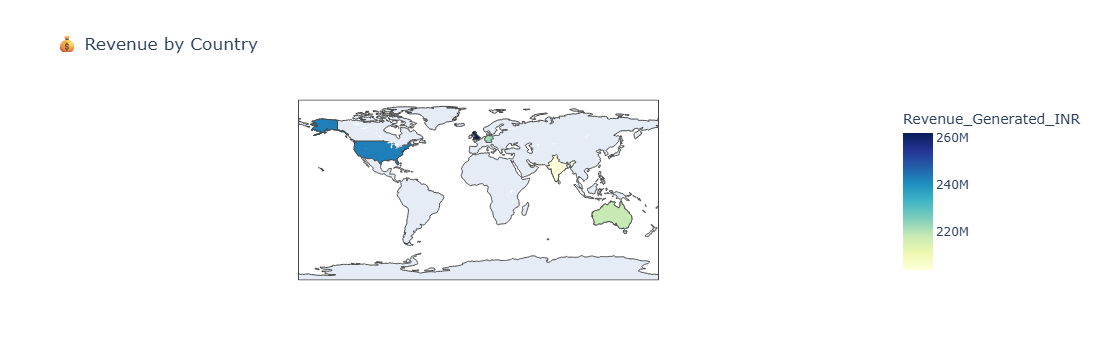

In [8]:
revenue_country = df.groupby('Country')['Revenue_Generated_INR'].sum().reset_index()

fig = px.choropleth(
    revenue_country,
    locations='Country',
    locationmode='country names',
    color='Revenue_Generated_INR',
    color_continuous_scale='YlGnBu',
    title='💰 Revenue by Country'
)
fig.show()

C:\Users\gates\AppData\Local\Temp\ipykernel_19636\3382834840.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\gates\AppData\Local\Temp\ipykernel_19636\3382834840.py:6: UserWarning:

Glyph 129514 (\N{TEST TUBE}) missing from current font.

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129514 (\N{TEST TUBE}) missing from current font.



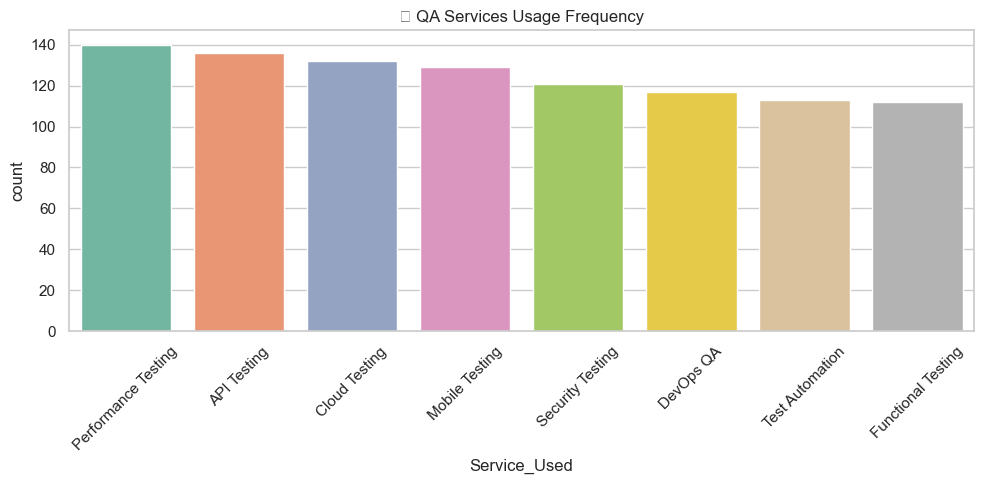

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Service_Used', order=df['Service_Used'].value_counts().index, palette='Set2')
plt.title("🧪 QA Services Usage Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.



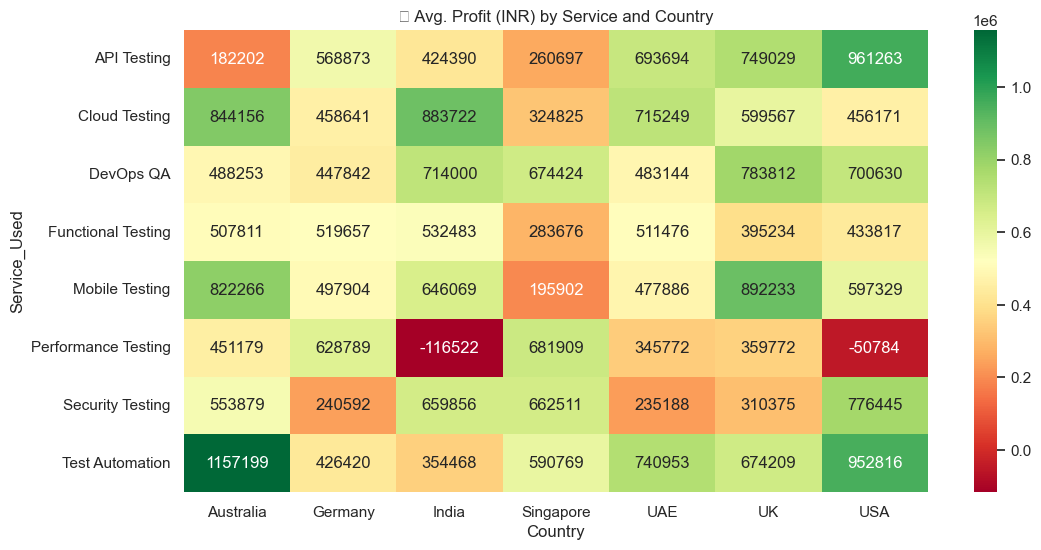

In [10]:
pivot = df.pivot_table(index='Service_Used', columns='Country', values='Profit_INR', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="RdYlGn")
plt.title("🔥 Avg. Profit (INR) by Service and Country")
plt.show()

C:\Users\gates\AppData\Local\Temp\ipykernel_19636\1469634053.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\gates\AppData\Local\Temp\ipykernel_19636\1469634053.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from current font.



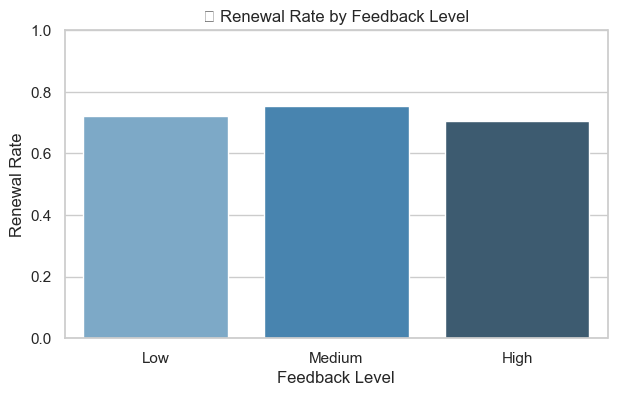

In [11]:
retention = df.groupby('Feedback_Level')['Renewed_Flag'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=retention, x='Feedback_Level', y='Renewed_Flag', palette='Blues_d')
plt.title("🧠 Renewal Rate by Feedback Level")
plt.ylabel("Renewal Rate")
plt.xlabel("Feedback Level")
plt.ylim(0,1)
plt.show()

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128368 (\N{MANTELPIECE CLOCK}) missing from current font.

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.



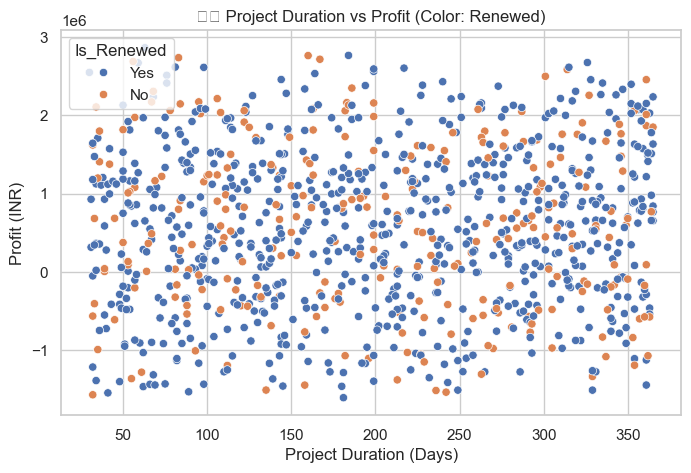

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Project_Duration_Days', y='Profit_INR', hue='Is_Renewed')
plt.title("🕰️ Project Duration vs Profit (Color: Renewed)")
plt.xlabel("Project Duration (Days)")
plt.ylabel("Profit (INR)")
plt.show()

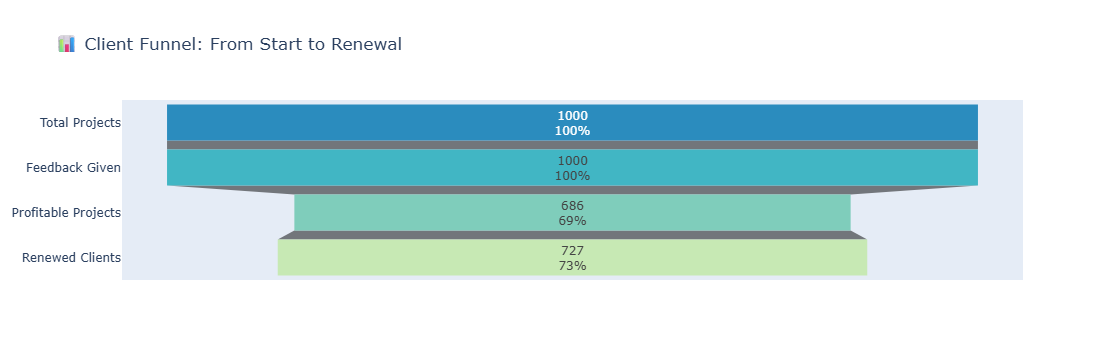

In [13]:
stages = {
    'Total Projects': len(df),
    'Feedback Given': df['Feedback_Score'].notnull().sum(),
    'Profitable Projects': (df['Profit_INR'] > 0).sum(),
    'Renewed Clients': (df['Renewed_Flag'] == 1).sum()
}

import plotly.graph_objects as go

fig = go.Figure(go.Funnel(
    y=list(stages.keys()),
    x=list(stages.values()),
    textinfo="value+percent initial",
    marker={"color": ["#2b8cbe", "#41b6c4", "#7fcdbb", "#c7e9b4"]}
))
fig.update_layout(title="📊 Client Funnel: From Start to Renewal")
fig.show()

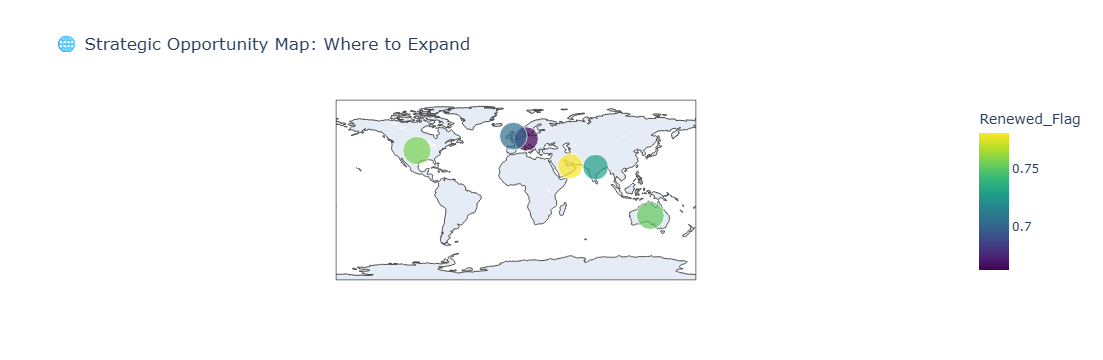

In [14]:
strategy_map = df.groupby('Country').agg({
    'Profit_INR': 'mean',
    'Revenue_Generated_INR': 'mean',
    'Renewed_Flag': 'mean'
}).reset_index()

fig = px.scatter_geo(
    strategy_map,
    locations="Country",
    locationmode="country names",
    size="Profit_INR",
    color="Renewed_Flag",
    hover_name="Country",
    title="🌐 Strategic Opportunity Map: Where to Expand",
    color_continuous_scale="Viridis"
)
fig.show()

C:\Users\gates\AppData\Local\Temp\ipykernel_19636\3091226327.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\gates\AppData\Local\Temp\ipykernel_19636\3091226327.py:5: UserWarning:

Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from current font.

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from current font.



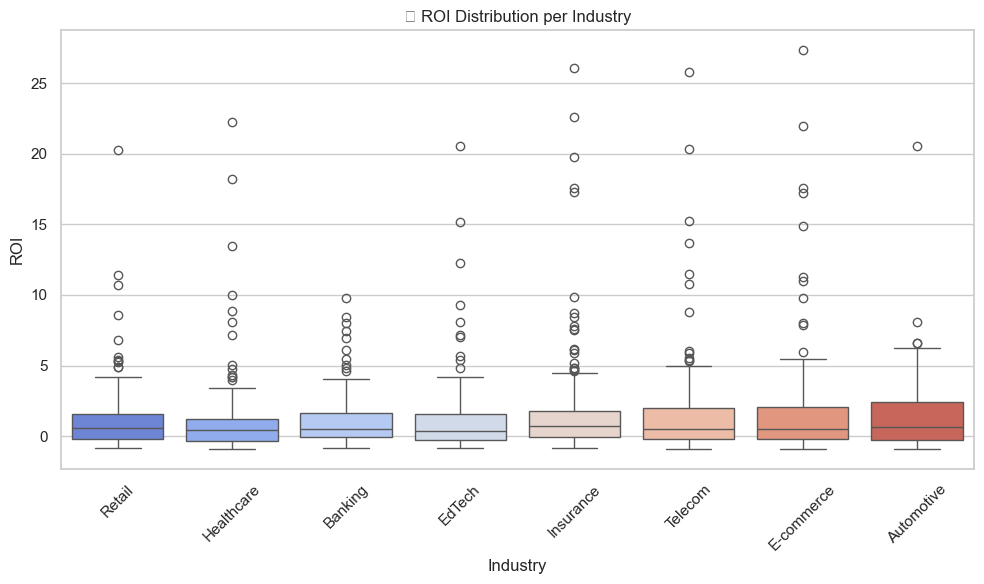

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Industry', y='ROI', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("💹 ROI Distribution per Industry")
plt.tight_layout()
plt.show()

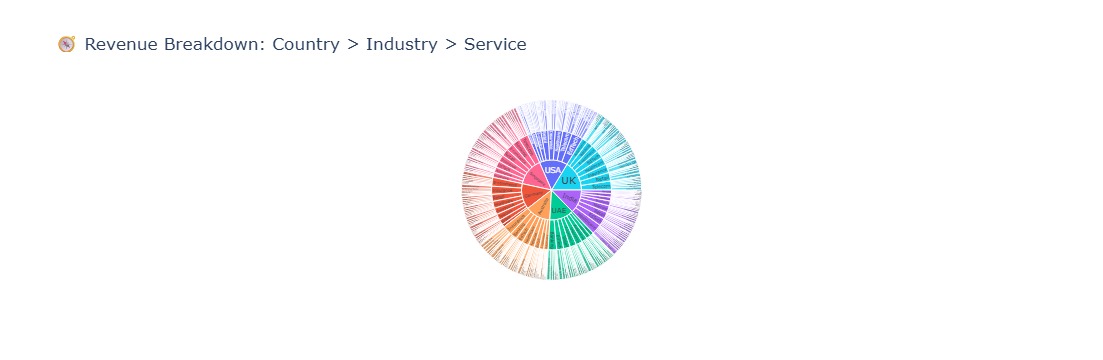

In [16]:
fig = px.sunburst(
    df,
    path=['Country', 'Industry', 'Service_Used'],
    values='Revenue_Generated_INR',
    color='Country',
    title='🧭 Revenue Breakdown: Country > Industry > Service'
)
fig.show()

In [17]:
high_risk = df[(df['ROI'] < 0.1) & (df['Feedback_Score'] < 5) & (df['Renewed_Flag'] == 0)]
print("⚠️ High Risk Clients:", high_risk.shape[0])
high_risk[['Client_Name', 'Country', 'Industry', 'Profit_INR', 'Feedback_Score']]

⚠️ High Risk Clients: 18


Client_Name    Country    Industry  Profit_INR  Feedback_Score
6     Client_58        USA     Banking     -267128               4
45    Client_87  Australia  Healthcare    -1068709               4
112   Client_59        UAE  E-commerce     -977470               4
131   Client_64  Singapore      EdTech      187914               4
208   Client_93         UK  E-commerce     -685780               4
267   Client_19        USA  E-commerce    -1193525               4
318   Client_13         UK     Telecom       44233               4
332   Client_43        USA   Insurance     -416243               4
338   Client_74        UAE   Insurance       91654               4
444   Client_54    Germany     Telecom     -384342               4
527   Client_59    Germany     Banking       27715               4
551   Client_10        USA  E-commerce    -1279396               4
676  Client_119        USA  Automotive     -573630               4
685  Client_136    Germany  E-commerce     -404838               4
778  Client_137        UAE  E-commerce     -437053               4
816  Client_167    Germany  E-commerce     -482547               4
963  Client_109         UK      Retail     -427936               4
990  Client_151  Australia     Telecom     -130829               4

In [18]:
kpis = {
    "Total Projects": len(df),
    "Avg. ROI": df['ROI'].mean(),
    "Profit ≥ 5L Projects": (df['Profit_INR'] >= 500000).sum(),
    "Clients at Risk": high_risk.shape[0]
}

pd.DataFrame.from_dict(kpis, orient='index', columns=['Value'])

Value
Total Projects        1000.000000
Avg. ROI                 1.540296
Profit ≥ 5L Projects   518.000000
Clients at Risk         18.000000

In [19]:
total_projects = df.shape[0]
avg_cost = df['Project_Cost_INR'].mean()
avg_revenue = df['Revenue_Generated_INR'].mean()
avg_profit = df['Profit_INR'].mean()
renew_rate = df['Renewed_Flag'].mean() * 100
avg_feedback = df['Feedback_Score'].mean()

print("📊 KPI Dashboard")
print(f"Total Projects: {total_projects}")
print(f"Avg. Cost: ₹{avg_cost:,.0f}")
print(f"Avg. Revenue: ₹{avg_revenue:,.0f}")
print(f"Avg. Profit: ₹{avg_profit:,.0f}")
print(f"Renewal Rate: {renew_rate:.1f}%")
print(f"Avg. Feedback Score: {avg_feedback:.2f}")

📊 KPI Dashboard
Total Projects: 1000
Avg. Cost: ₹1,049,351
Avg. Revenue: ₹1,600,731
Avg. Profit: ₹551,380
Renewal Rate: 72.7%
Avg. Feedback Score: 6.97


In [20]:
import numpy as np
import pandas as pd

# Simulate Project_Start_Date over last 3 years
np.random.seed(42)
date_range = pd.date_range(start="2022-01-01", end="2025-06-30", periods=len(df))
df['Project_Start_Date'] = pd.to_datetime(np.random.choice(date_range, size=len(df)))

In [21]:
df['Project_Year'] = df['Project_Start_Date'].dt.year
df['Project_Month'] = df['Project_Start_Date'].dt.month
df['Project_Month_Year'] = df['Project_Start_Date'].dt.to_period('M').astype(str)

C:\Users\gates\AppData\Local\Temp\ipykernel_19636\2301476795.py:9: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from current font.

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from current font.



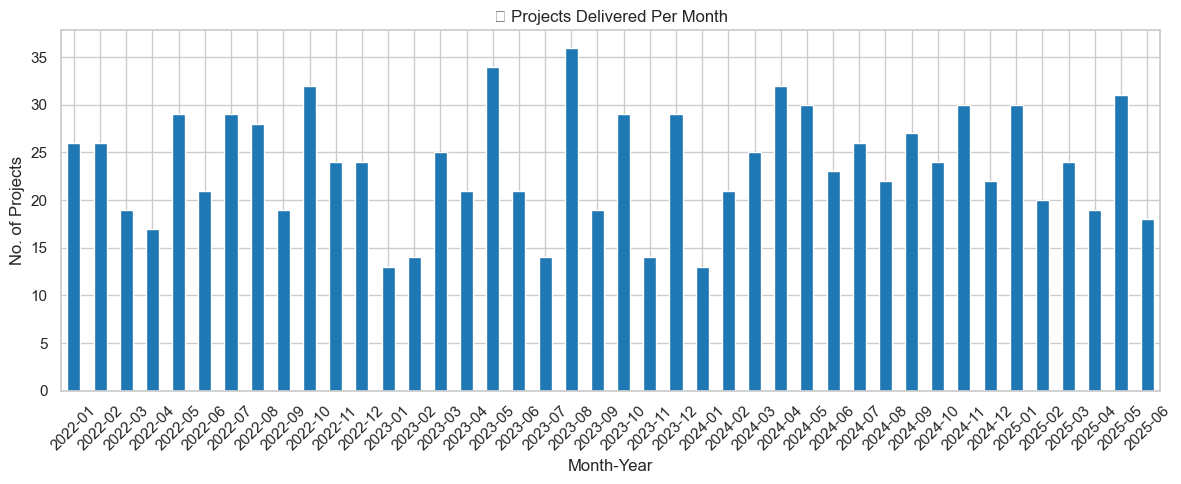

In [22]:
monthly_counts = df['Project_Month_Year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
monthly_counts.plot(kind='bar', color='#1f77b4')
plt.title("📅 Projects Delivered Per Month")
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("No. of Projects")
plt.tight_layout()
plt.show()

C:\Users\gates\AppData\Local\Temp\ipykernel_19636\846385914.py:9: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.



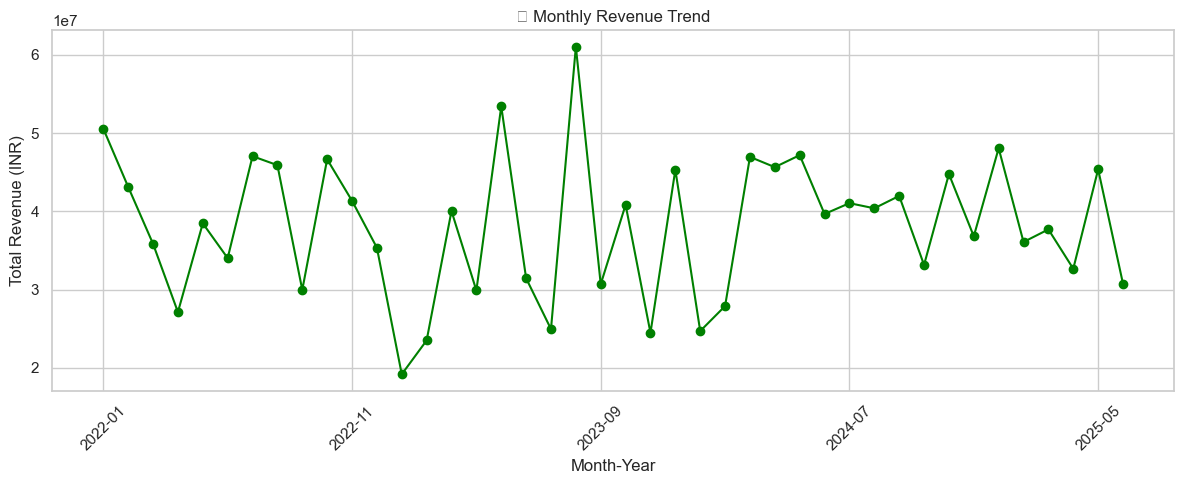

In [23]:
monthly_revenue = df.groupby('Project_Month_Year')['Revenue_Generated_INR'].sum()

plt.figure(figsize=(12,5))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title("💸 Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (INR)")
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\gates\AppData\Local\Temp\ipykernel_19636\3704305005.py:8: UserWarning:

Glyph 129534 (\N{RECEIPT}) missing from current font.

C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129534 (\N{RECEIPT}) missing from current font.



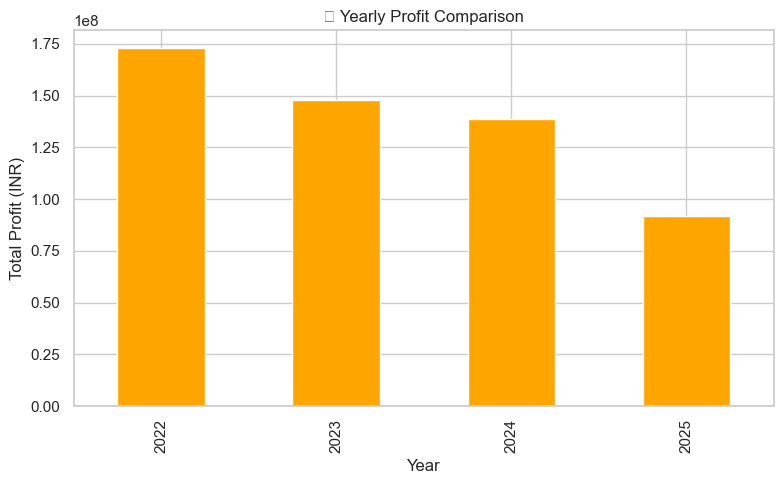

In [24]:
yearly_profit = df.groupby('Project_Year')['Profit_INR'].sum()

plt.figure(figsize=(8,5))
yearly_profit.plot(kind='bar', color='orange')
plt.title("🧾 Yearly Profit Comparison")
plt.xlabel("Year")
plt.ylabel("Total Profit (INR)")
plt.tight_layout()
plt.show()

In [25]:
monthly_kpis = df.groupby('Project_Month_Year').agg({
    'Project_Cost_INR': 'sum',
    'Revenue_Generated_INR': 'sum',
    'Profit_INR': 'sum',
    'Renewed_Flag': 'mean'
}).round(2)

monthly_kpis.columns = ['Total Cost', 'Total Revenue', 'Total Profit', 'Renewal Rate']
monthly_kpis.tail(12)  # Show last 12 months

Total Cost  Total Revenue  Total Profit  Renewal Rate
Project_Month_Year                                                       
2024-07               28975282       41041482      12066200          0.77
2024-08               27284241       40383565      13099324          0.82
2024-09               32561288       41968463       9407175          0.85
2024-10               28663680       33145166       4481486          0.62
2024-11               36061372       44760721       8699349          0.77
2024-12               20391018       36806053      16415035          0.73
2025-01               28370568       48057651      19687083          0.83
2025-02               18902179       36075447      17173268          0.70
2025-03               22735348       37687373      14952025          0.67
2025-04               22375170       32657786      10282616          0.74
2025-05               32081592       45360913      13279321          0.84
2025-06               14141690       30734150      16592460          0.67